In [1]:
import os
import re
import random
# import subprocess
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import torch
# from typing import Literal
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, AddedToken
# from transformers import TrainingArguments, Trainer
# from transformers import DataCollatorWithPadding
# from transformers import TextClassificationPipeline
# from transformers.pipelines.pt_utils import KeyDataset
# from datasets import Dataset
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import cohen_kappa_score
# from IPython.display import FileLink, display

warnings.simplefilter("ignore")

In [4]:
class PATH:
    kaggle_origin_train = "./dataset/kaggle/train.csv"
    kaggle_persuade_train = "./dataset/separated/kaggle_persuade_train.csv"
    kaggle_train = "./dataset/separated/kaggle_train.csv"
    persuade_train = "./dataset/separated/persuade_train.csv"

In [8]:
kaggle_origin_train = pd.read_csv(PATH.kaggle_origin_train)
kaggle_persuade_train = pd.read_csv(PATH.kaggle_persuade_train)
kaggle_train = pd.read_csv(PATH.kaggle_train)
persuade_train = pd.read_csv(PATH.persuade_train)

# length of each data
kaggle_origin_train["length"] = kaggle_origin_train["full_text"].apply(lambda x: len(x))
kaggle_persuade_train["length"] = kaggle_persuade_train["full_text"].apply(lambda x: len(x))
kaggle_train["length"] = kaggle_train["full_text"].apply(lambda x: len(x))
persuade_train["length"] = persuade_train["full_text"].apply(lambda x: len(x))

print(kaggle_origin_train.head())
print(kaggle_persuade_train.head())
print(kaggle_train.head())
print(persuade_train.head())

  essay_id                                          full_text  score  length
0  000d118  Many people have car where they live. The thin...      3    2677
1  000fe60  I am a scientist at NASA that is discussing th...      3    1669
2  001ab80  People always wish they had the same technolog...      4    3077
3  001bdc0  We all heard about Venus, the planet without a...      4    2701
4  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3    2208
  essay_id                                          full_text  score  length
0  000d118  Many people have car where they live. The thin...      3    2677
1  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3    2208
2  0030e86  If I were to choose between keeping the electo...      4    2374
3  0033bf4  What is the Seagoing Cowboys progam?\n\nIt was...      3    1992
4  0036253  The challenge of exploring Venus\n\nThis stori...      2    1870
  essay_id                                          full_text  score  length

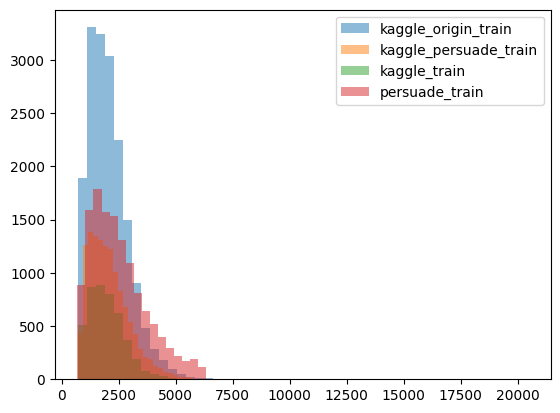

In [ ]:
# draw the length distribution
plot = plt.figure()
plt.hist(kaggle_origin_train["length"], bins=50, alpha=0.5, label="kaggle_origin_train")
plt.hist(kaggle_persuade_train["length"], bins=50, alpha=0.5, label="kaggle_persuade_train")
plt.hist(kaggle_train["length"], bins=50, alpha=0.5, label="kaggle_train")
plt.hist(persuade_train["length"], bins=50, alpha=0.5, label="persuade_train")
plt.legend()
plt.show()
plot.savefig("length_distribution.png")

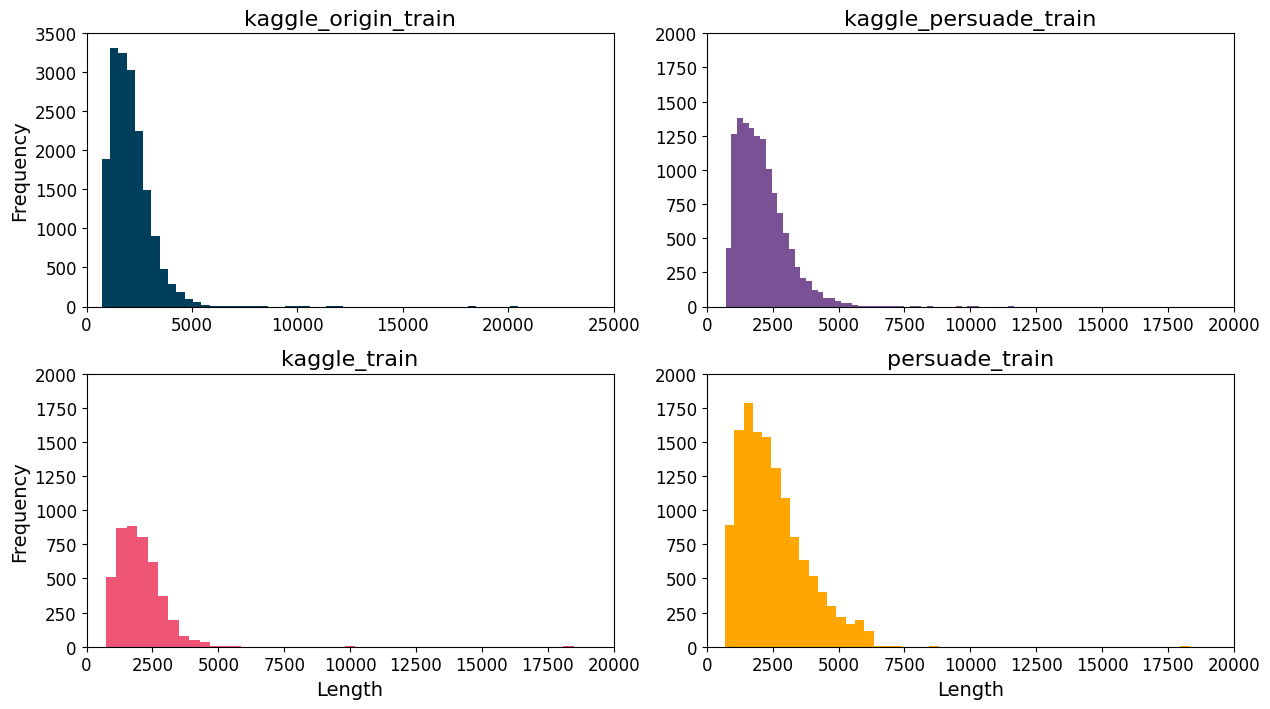

In [140]:
# Create the figure
plot = plt.figure(figsize=(16 * 0.8, 9 * 0.8))

# Subplot 1: kaggle_origin_train
ax1 = plot.add_subplot(221)
ax1.hist(kaggle_origin_train["length"], bins=50, alpha=1, color="#003f5c", label="kaggle_origin_train")
ax1.set_title("kaggle_origin_train", fontsize=16)
ax1.set_ylabel("Frequency", fontsize=14)
ax1.set_ylim(0, 3500)
ax1.set_xlim(0, 25000)
ax1.tick_params(axis='both', labelsize=12)

# Subplot 2: kaggle_persuade_train
ax2 = plot.add_subplot(222)
ax2.hist(kaggle_persuade_train["length"], bins=50, alpha=1, color="#7a5195", label="kaggle_persuade_train")
ax2.set_title("kaggle_persuade_train", fontsize=16)
ax2.set_ylim(0, 2000)
ax2.set_xlim(0, 20000)
ax2.tick_params(axis='both', labelsize=12)

# Subplot 3: kaggle_train
ax3 = plot.add_subplot(223)
ax3.hist(kaggle_train["length"], bins=50, alpha=1, color="#ef5675", label="kaggle_train")
ax3.set_title("kaggle_train", fontsize=16)
ax3.set_xlabel("Length", fontsize=14)
ax3.set_ylabel("Frequency", fontsize=14)
ax3.set_ylim(0, 2000)
ax3.set_xlim(0, 20000)
ax3.tick_params(axis='both', labelsize=12)

# Subplot 4: persuade_train
ax4 = plot.add_subplot(224)
ax4.hist(persuade_train["length"], bins=50, alpha=1, color="#ffa600", label="persuade_train")
ax4.set_title("persuade_train", fontsize=16)
ax4.set_xlabel("Length", fontsize=14)
ax4.set_ylim(0, 2000)
ax4.set_xlim(0, 20000)
ax4.tick_params(axis='both', labelsize=12)

# Adjust layout, show, and save
plt.tight_layout()
plt.show()
plot.savefig("length_distribution.png")

In [38]:
[len(kaggle_origin_train.loc[kaggle_origin_train["score"] == score]) for score in range(1, 7)]

[1252, 4723, 6280, 3926, 970, 156]

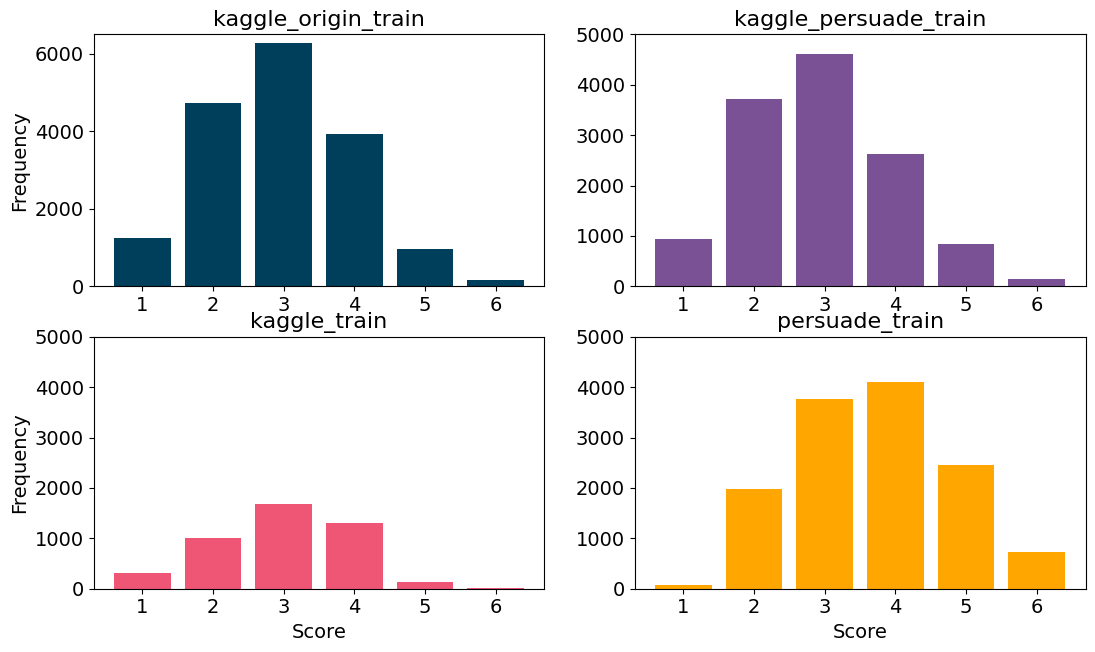

In [139]:
# draw the score distribution
plot = plt.figure(figsize=(16 * 0.8, 9 * 0.8))
ax1 = plot.add_subplot(221)
ax1.bar(range(1, 7), [len(kaggle_origin_train.loc[kaggle_origin_train["score"] == score]) for score in range(1, 7)], alpha=1, label="kaggle_origin_train", color="#003f5c")
ax1.set_ylim(0, 6500)
ax1.set_title("kaggle_origin_train", fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylabel("Frequency", fontsize=14)

ax2 = plot.add_subplot(222)
ax2.bar(range(1, 7), [len(kaggle_persuade_train.loc[kaggle_persuade_train["score"] == score]) for score in range(1, 7)], alpha=1, label="kaggle_persuade_train", color="#7a5195")
ax2.set_ylim(0, 5000)
ax2.set_title("kaggle_persuade_train", fontsize=16)
ax2.tick_params(axis='both', labelsize=14)

ax3 = plot.add_subplot(223)
ax3.bar(range(1, 7), [len(kaggle_train.loc[kaggle_train["score"] == score]) for score in range(1, 7)], alpha=1, label="kaggle_train", color="#ef5675")
ax3.set_ylim(0, 5000)
ax3.set_title("kaggle_train", fontsize=16)
ax3.set_ylabel("Frequency", fontsize=14)
ax3.set_xlabel("Score", fontsize=14)
ax3.tick_params(axis='both', labelsize=14)

ax4 = plot.add_subplot(224)
ax4.bar(range(1, 7), [len(persuade_train.loc[persuade_train["score"] == score]) for score in range(1, 7)], alpha=1, label="persuade_train", color="#ffa600")
ax4.set_ylim(0, 5000)
ax4.set_title("persuade_train", fontsize=16)
ax4.set_xlabel("Score", fontsize=14)
ax4.tick_params(axis='both', labelsize=14)
# plt.legend()
plt.show()
plot.savefig("score_distribution2.png")